In [58]:
import numpy as np

In [59]:
def func(x):
    return x**2 + np.exp(x)

In [60]:
x = np.array([1,1.5,2,2.5,3,3.5,4,4.5,5])
y = np.array([0.16, 0.68, 1.96, 2.79, 3.80, 6.81, 9.50, 15.60, 24.86])
y = func(x)
n = len(x)
m = 4

In [61]:
a = np.array([[sum(x**(i + j - 2)) for j in range(1,m+1)] for i in range(1,m+1)])
a

array([[9.00000000e+00, 2.70000000e+01, 9.60000000e+01, 3.78000000e+02],
       [2.70000000e+01, 9.60000000e+01, 3.78000000e+02, 1.58325000e+03],
       [9.60000000e+01, 3.78000000e+02, 1.58325000e+03, 6.90075000e+03],
       [3.78000000e+02, 1.58325000e+03, 6.90075000e+03, 3.09125625e+04]])

In [62]:
b = np.array([sum(y*x**(i - 1)) for i in range(1,m+1)])
b

array([  469.00095028,  1974.37134166,  8694.92929962, 39378.92997873])

In [63]:
lambd = np.dot(np.linalg.inv(a), b)
lambd

array([-29.71590847,  51.51145182, -23.75591421,   4.30212352])

In [64]:
x_help = np.array([x**i for i in range(m)])
x_help = np.array([sum(-lambd*[x[j]**i for i in range(m)]) for j in range(n)])
x_help

array([  -2.34175267,   -8.62012918,  -12.70032652,  -17.80893731,
        -27.17255421,  -44.01776986,  -71.57117689, -113.05936795,
       -171.70893569])

In [65]:
delta = 1 / np.sqrt(n) * np.sqrt(sum((y + x_help)**2))
delta

1.6563945358313907

In [66]:
sigma = delta / np.sqrt(np.sum(y**2))
sigma

0.007360106164402787

In [67]:
x_inner = (x[:-1] + x[1:]) / 2
z = [sum(lambd*[x_in**i for i in range(m)]) for x_in in x_inner]
z

[5.957375364168584,
 10.733338207575272,
 14.924418191888734,
 21.757207959027355,
 34.45830015090951,
 56.25428740945364,
 90.37176237657803,
 140.0373176942012]

In [68]:
import matplotlib.pyplot as plt

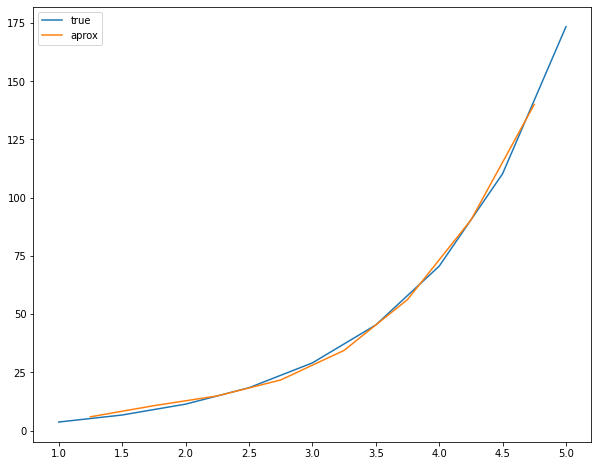

In [69]:
fig, ax = plt.subplots(figsize= (10,8))
ax.plot(x, y, label='true')
ax.plot(x_inner, z, label='aprox')
ax.legend()